1. Name - Humera Bano
2. Github ID - humera811
3. USC ID - 7255691039

In [129]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

# __1. Supervised, Semi-Supervised, and Unsupervised Learning__

### __a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.__

In [130]:
breastcancer_df=pd.read_csv("../data/wdbc.data",header=None)
breastcancer_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [131]:
new_col_names=['id','class']
for i in range(1,breastcancer_df.shape[1]-1):
    new_col_names.append('feature'+str(i))
breastcancer_df.columns=new_col_names
breastcancer_df


,id,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [132]:
breastcancer_df['class'] = pd.factorize(breastcancer_df['class'])[0]
breastcancer_df

,id,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [133]:
breastcancer_df["class"].value_counts()

1    357
0    212
Name: class, dtype: int64

## __(b) Monte-Carlo Simulation:__

### __Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.__

In [134]:
def split_data(data):
    malignant_datax, = np.where(data['class'] == 1) # malognant data points
    malignant_test_datax = np.random.choice(malignant_datax, round(len(malignant_datax) * 0.2), replace=False) # 20% as test set
    benign_datax, = np.where(data['class'] == 0) # 20% benign datapoints 
    benign_test_datax = np.random.choice(benign_datax, round(len(benign_datax) * 0.2), replace=False) # 20% testset
    test_df = np.concatenate([malignant_test_datax, benign_test_datax])
    train_datax = np.array([row for row in range(data.shape[0]) if row not in test_df]) # traindata

# splitting the data into train and testset
    trainX = data.iloc[train_datax, 2:]
    trainY = data.iloc[train_datax, 1]
    testX = data.iloc[test_df, 2:]
    testY = data.iloc[test_df, 1]
    return trainX, trainY, testX, testY

In [135]:
cancer_train_X, cancer_train_Y, cancer_test_X, cancer_test_Y = split_data(breastcancer_df)
cancer_train_Y

0      0
1      0
2      0
4      0
5      0
      ..
561    1
562    0
563    0
566    0
568    1
Name: class, Length: 456, dtype: int64

In [136]:
cancer_test_Y

211    1
287    1
546    1
387    1
465    1
      ..
99     0
30     0
441    0
274    0
15     0
Name: class, Length: 113, dtype: int64

In [137]:
def normalizeData(trainX, testX):
    scaler = Normalizer()
    norm_trainX = scaler.fit_transform(trainX)
    norm_testX = scaler.transform(testX)
    return norm_trainX, norm_testX

In [138]:
def curve_and_matrix(truth, predict, prob, report, title):
    print("Confusion matrix of ",title, "\n", confusion_matrix(truth, predict)) # the confusion matrix
    print("Accuracy :",report['accuracy']) # accuracy
    fpr, tpr, thresholds = roc_curve(truth, prob, pos_label=1) # roc-auc curve
    roc_auc = round(auc(fpr, tpr), 4)

    #graph plot
    plt.close()
    fig, axes = plt.subplots(figsize=(12, 8))
    axes.set_ylabel("True Positive Rate")
    axes.set_xlabel("False Positive Rate")
    axes.set_title("ROC curves of {} set".format(title))
    axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    axes.plot([0, 1], [0, 1], "--")
    axes.legend()
    plt.show()

In [139]:
def metrics(truth, predict, prob, report):
    fpr, tpr, thresholds = roc_curve(truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {
        'accuracy' : report['accuracy'],
        'recall' : report['weighted avg']['recall'],
        'f1-score' : report['weighted avg']['f1-score'],
        'precision' : report['weighted avg']['precision'],
        'auc' : roc_auc
    }

### __i. Supervised Learning:__

### __Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.__

In [140]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
learnings = {}
def learning(data,type_learn):
    pg = {'C' : np.logspace(-4, 5, 10)}
    params = {
        'param_grid' : pg, 
        'cv': StratifiedKFold(5, random_state=4, shuffle=True)
    }
    trainTotal = pd.DataFrame(columns=['accuracy', 'recall', 'f1-score', 'precision', 'auc'])
    testTotal = pd.DataFrame(columns=['accuracy', 'recall', 'f1-score', 'precision', 'auc'])
    for i in range(30): # taking M as 30
        trainX, trainY, testX, testY = split_data(data)
        trainX, testX = normalizeData(trainX, testX)
        if type_learn == "supervise":
            classifier = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
            classifier.fit(trainX, trainY)
        elif type_learn == "semi-supervise":
            classifier =  semisvm(trainX, trainY, params)
        prob_train_pred = classifier.decision_function(trainX)
        trainPred = classifier.predict(trainX)
        trainReport = classification_report(trainY, trainPred, output_dict=True)
        trainResult = metrics(trainY, trainPred, prob_train_pred, trainReport)
        trainTotal = trainTotal.append(trainResult, ignore_index=True)
        prob_test_pred = classifier.decision_function(testX)
        testPred = classifier.predict(testX)
        testReport = classification_report(testY, testPred, output_dict=True)
        testResult = metrics(testY, testPred, prob_test_pred, testReport)
        testTotal = testTotal.append(testResult, ignore_index=True)
       
        print("MonteCarlo Simulation Attempt :",i+1)
        print("Test Accuracy : ",testReport['accuracy'])
        print("Train Accuracy : ",trainReport['accuracy'])
        print("Best C : ", classifier.best_params_['C'])
        print("-----"*5)
    
    # Avg metrics
    trainTotal = trainTotal.apply(lambda hv: hv.mean(), axis=0)
    testTotal = testTotal.apply(lambda hv: hv.mean(), axis=0)
    
    print('Average Metrics')
    print("-----"*5)
    info = pd.concat([trainTotal, testTotal], axis=1)
    info = info.T
    info = info.set_index(pd.Series(['training', 'test']))
    print(info)
    print("-----"*5)
    
    curve_and_matrix(trainY, trainPred, prob_train_pred, trainReport, 'training')
    curve_and_matrix(testY, testPred, prob_test_pred, testReport, 'test')
    
    return info

MonteCarlo Simulation Attempt : 1
Test Accuracy :  0.9734513274336283
Train Accuracy :  0.9824561403508771
Best C :  10000.0
-------------------------
MonteCarlo Simulation Attempt : 2
Test Accuracy :  0.9469026548672567
Train Accuracy :  0.9846491228070176
Best C :  10000.0
-------------------------
MonteCarlo Simulation Attempt : 3
Test Accuracy :  0.9734513274336283
Train Accuracy :  0.9824561403508771
Best C :  10000.0
-------------------------
MonteCarlo Simulation Attempt : 4
Test Accuracy :  0.9911504424778761
Train Accuracy :  0.9824561403508771
Best C :  100000.0
-------------------------
MonteCarlo Simulation Attempt : 5
Test Accuracy :  0.9646017699115044
Train Accuracy :  0.9912280701754386
Best C :  100000.0
-------------------------
MonteCarlo Simulation Attempt : 6
Test Accuracy :  0.9380530973451328
Train Accuracy :  0.9956140350877193
Best C :  100000.0
-------------------------
MonteCarlo Simulation Attempt : 7
Test Accuracy :  0.9557522123893806
Train Accuracy :  0.9

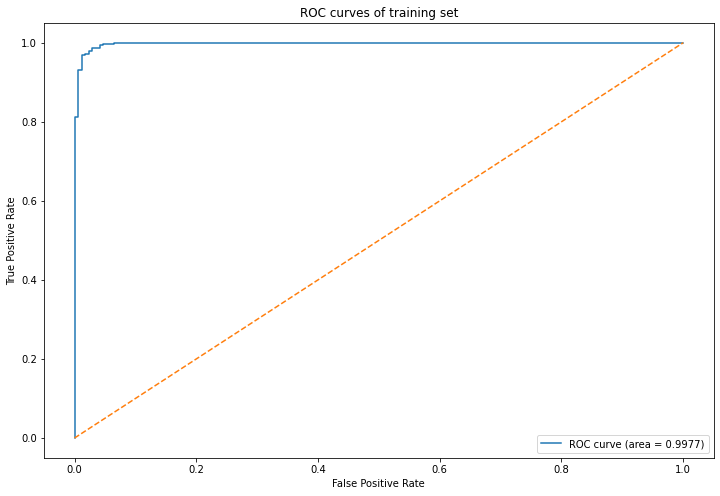

Confusion matrix of  test 
 [[40  2]
 [ 0 71]]
Accuracy : 0.9823008849557522


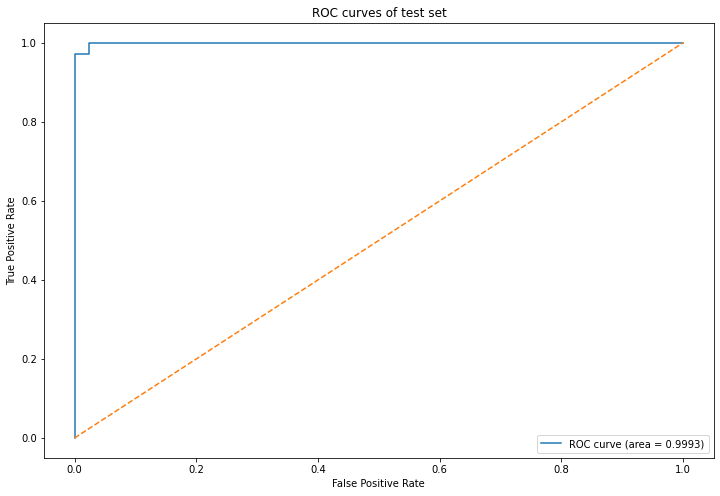

In [141]:
learnings['Supervised'] = learning(breastcancer_df,"supervise")

### __ii. Semi-Supervised Learning/ Self-training: Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.__

### __A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.__

### __B. Find the unlabeled datapoint that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.__

In [142]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

def semisvm(trainX, trainY, params):
    labeledDatax = []
    for c in [0, 1]:
        c_x, = np.where(trainY == c)
        num_ = round(len(c_x) * 0.5)
        selectDatax = np.random.choice(c_x, num_, replace=False)
        labeledDatax.extend(selectDatax)
    unlabeledDatax = [i for i in range(len(trainX)) if i not in labeledDatax]
    labeled_X = trainX[labeledDatax].tolist()
    labeled_Y = trainY.iloc[labeledDatax].tolist()
    unlabeled_X = trainX[unlabeledDatax].tolist()
    unlabeled_Y = trainY.iloc[unlabeledDatax].to_numpy().tolist()
    modelClassifier = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
    modelClassifier.fit(labeled_X, labeled_Y)
    while len(unlabeled_X) > 0:
        scores = modelClassifier.decision_function(unlabeled_X)
        sorted_datax = sorted([i for i in range(len(unlabeled_X))],key=lambda hv : abs(scores[hv]))
        unlabeled_X = [unlabeled_X[i] for i in sorted_datax]
        unlabeled_Y = [unlabeled_Y[i] for i in sorted_datax]
        labeled_X.append(unlabeled_X.pop())
        labeled_Y.append(unlabeled_Y.pop())
        modelClassifier.best_estimator_.fit(labeled_X, labeled_Y)
    return modelClassifier

MonteCarlo Simulation Attempt : 1
Test Accuracy :  0.9911504424778761
Train Accuracy :  0.9824561403508771
Best C :  100000.0
-------------------------
MonteCarlo Simulation Attempt : 2
Test Accuracy :  0.9734513274336283
Train Accuracy :  0.9802631578947368
Best C :  100000.0
-------------------------
MonteCarlo Simulation Attempt : 3
Test Accuracy :  0.9911504424778761
Train Accuracy :  0.9824561403508771
Best C :  10000.0
-------------------------
MonteCarlo Simulation Attempt : 4
Test Accuracy :  0.9734513274336283
Train Accuracy :  0.9824561403508771
Best C :  10000.0
-------------------------
MonteCarlo Simulation Attempt : 5
Test Accuracy :  0.9469026548672567
Train Accuracy :  0.9846491228070176
Best C :  10000.0
-------------------------
MonteCarlo Simulation Attempt : 6
Test Accuracy :  0.9646017699115044
Train Accuracy :  0.9846491228070176
Best C :  100000.0
-------------------------
MonteCarlo Simulation Attempt : 7
Test Accuracy :  0.9557522123893806
Train Accuracy :  0.9

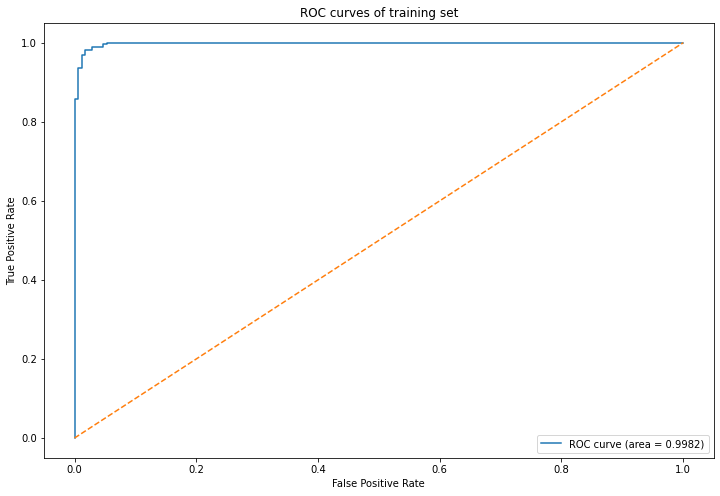

Confusion matrix of  test 
 [[40  2]
 [ 0 71]]
Accuracy : 0.9823008849557522


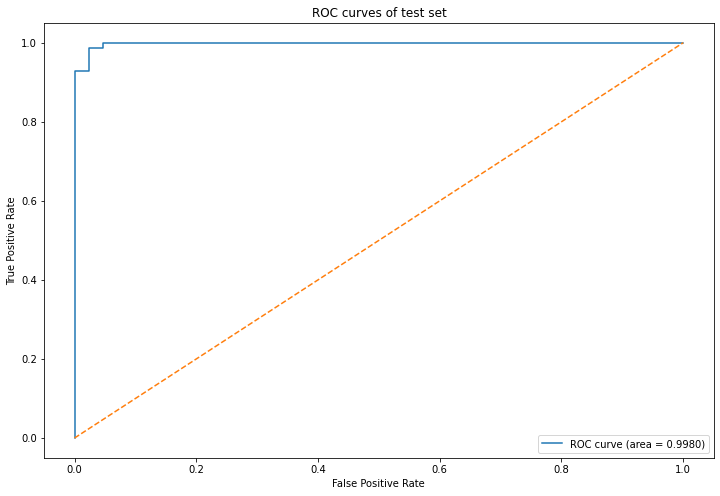

In [143]:
learnings['Semi-Supervised'] = learning(breastcancer_df,"semi-supervise")

### __iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.__

### __A. Run the k-means algorithm multiple times. Make sure that you initialize the algorithm randomly. How do you make sure that the algorithm was not trapped in a local minimum?__

- By setting number of iterations, we make sure that the algorithm was not trapped in a local minimum.
- it can be run multiple times. max_iter parameter is used to restart the algorithm many times.

### __B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.__

### __C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data__

In [144]:
def getDistance(centers, X, cluster_label):
    dist = np.ndarray((X.shape[0],))
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba
def getMajority(X, cluster_label, dist, Y):
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(cluster_label == cluster)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label2cluster[majority] = cluster
    return label2cluster, major_label

In [145]:
def MCKmeans(data, n):
    pg = {'C' : np.logspace(-4, 5, 10)}
    params = {
        'param_grid' : pg, 
        'cv': StratifiedKFold(5, random_state=4, shuffle=True)
    }
    train_resdf = pd.DataFrame(columns=['accuracy','precision', 'recall', 'f1-score', 'auc'])
    test_resdf = pd.DataFrame(columns=['accuracy','precision', 'recall', 'f1-score', 'auc'])
    for i in range(n):
        trainX, trainY, testX, testY = split_data(data)
        trainX, testX = normalizeData(trainX, testX)
        clusterer = KMeans(n_clusters=2, n_init = 15).fit(trainX)
        train_cluster_label = clusterer.predict(trainX)
        dist, trainPredY_prob = getDistance(clusterer.cluster_centers_, trainX, train_cluster_label)
        label2cluster, trainPredY = getMajority(trainX, train_cluster_label, dist, trainY)
        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = metrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        test_cluster_label = clusterer.predict(testX)
        dist, testPredY_prob = getDistance(clusterer.cluster_centers_, testX, test_cluster_label)
        label2cluster, testPredY = getMajority(testX, test_cluster_label, dist, testY)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = metrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        # log information
        print("Unsupervised-KMeans Attempt :",i+1)
        print("Test Accuracy : ",testReport['accuracy'])
        print("Train Accuracy : ",trainReport['accuracy'])
        print("-----"*5)
    
    # avg metrics
    train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
    print('Average Metrics')
    print('-----' * 5)
    sum_info = pd.concat([train_resdf, test_resdf], axis=1)
    sum_info = sum_info.T
    sum_info = sum_info.set_index(pd.Series(['training', 'test']))
    print(sum_info)
    
    # Conf Matrix & ROC-Curves
    curve_and_matrix(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
    curve_and_matrix(testY, testPredY, testPredY_prob, testReport, 'test')
    
    return sum_info

Unsupervised-KMeans Attempt : 1
Test Accuracy :  0.8938053097345132
Train Accuracy :  0.8837719298245614
-------------------------
Unsupervised-KMeans Attempt : 2
Test Accuracy :  0.8407079646017699
Train Accuracy :  0.9013157894736842
-------------------------
Unsupervised-KMeans Attempt : 3
Test Accuracy :  0.8849557522123894
Train Accuracy :  0.8881578947368421
-------------------------
Unsupervised-KMeans Attempt : 4
Test Accuracy :  0.8672566371681416
Train Accuracy :  0.8925438596491229
-------------------------
Unsupervised-KMeans Attempt : 5
Test Accuracy :  0.9203539823008849
Train Accuracy :  0.8793859649122807
-------------------------
Unsupervised-KMeans Attempt : 6
Test Accuracy :  0.8938053097345132
Train Accuracy :  0.8881578947368421
-------------------------
Unsupervised-KMeans Attempt : 7
Test Accuracy :  0.8938053097345132
Train Accuracy :  0.8903508771929824
-------------------------
Unsupervised-KMeans Attempt : 8
Test Accuracy :  0.8849557522123894
Train Accuracy 

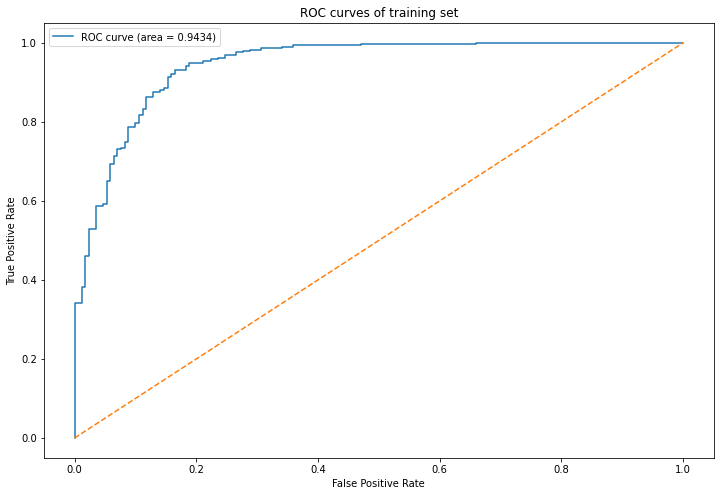

Confusion matrix of  test 
 [[33  9]
 [ 1 70]]
Accuracy : 0.911504424778761


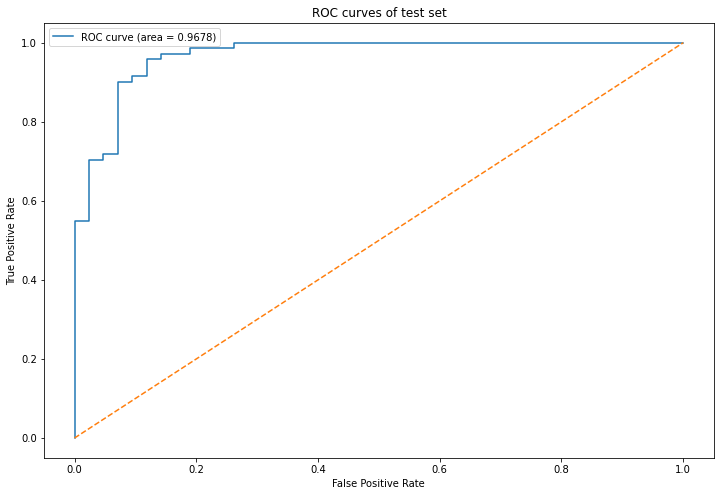

In [146]:
learnings['Unsupervised-KMeans'] = MCKmeans(breastcancer_df, 30)

### __iv) Spectral Clustering : Repeat 1(b)iii using spectral clustering , which is clus- tering based on kernels. 3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.__

In [147]:
def MCSpec(data, n):
    train_resdf = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    test_resdf = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    for i in range(n):
        trainX, trainY, testX, testY = split_data(data)
        trainX, testX = normalizeData(trainX, testX)
        cluster_label = SpectralClustering(n_clusters=2, assign_labels='kmeans', 
                                    affinity='rbf', eigen_tol = 1e-2, 
                                    eigen_solver = 'arpack', 
                                    random_state=0).fit_predict(trainX)
        cluster_centers = []
        for clus in [0,1]:
            cluster_centers.append(np.mean(trainX[cluster_label==clus], axis = 0).tolist())
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(trainX, cluster_label)
        train_cluster_label = knn.predict(trainX)
        dist, trainPredY_prob = getDistance(cluster_centers, trainX, train_cluster_label)
        label2cluster, trainPredY = getMajority(trainX, train_cluster_label, dist, trainY)
        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = metrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        test_cluster_label = knn.predict(testX)
        dist, testPredY_prob = getDistance(cluster_centers, testX, test_cluster_label)
        label2cluster, testPredY = getMajority(testX, test_cluster_label, dist, testY)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = metrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        # log information
        print("Unsupervised - Spectral Clustering Attempt :",i+1)
        print("Test Accuracy : ",testReport['accuracy'])
        print("Train Accuracy : ",trainReport['accuracy'])
        print("-----"*5)    
        
    # average metrics
    train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
    print('Average Metrics')
    print('-----' * 5)
    sum_info = pd.concat([train_resdf, test_resdf], axis=1)
    sum_info = sum_info.T
    sum_info = sum_info.set_index(pd.Series(['training', 'test']))
    print(sum_info)
    
    # Conf Matrix & ROC-Curves
    curve_and_matrix(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
    curve_and_matrix(testY, testPredY, testPredY_prob, testReport, 'test')
    return sum_info

Unsupervised - Spectral Clustering Attempt : 1
Test Accuracy :  0.9292035398230089
Train Accuracy :  0.8837719298245614
-------------------------
Unsupervised - Spectral Clustering Attempt : 2
Test Accuracy :  0.8495575221238938
Train Accuracy :  0.8903508771929824
-------------------------
Unsupervised - Spectral Clustering Attempt : 3
Test Accuracy :  0.8495575221238938
Train Accuracy :  0.8903508771929824
-------------------------
Unsupervised - Spectral Clustering Attempt : 4
Test Accuracy :  0.8849557522123894
Train Accuracy :  0.8859649122807017
-------------------------
Unsupervised - Spectral Clustering Attempt : 5
Test Accuracy :  0.831858407079646
Train Accuracy :  0.8881578947368421
-------------------------
Unsupervised - Spectral Clustering Attempt : 6
Test Accuracy :  0.9026548672566371
Train Accuracy :  0.868421052631579
-------------------------
Unsupervised - Spectral Clustering Attempt : 7
Test Accuracy :  0.8407079646017699
Train Accuracy :  0.8925438596491229
------

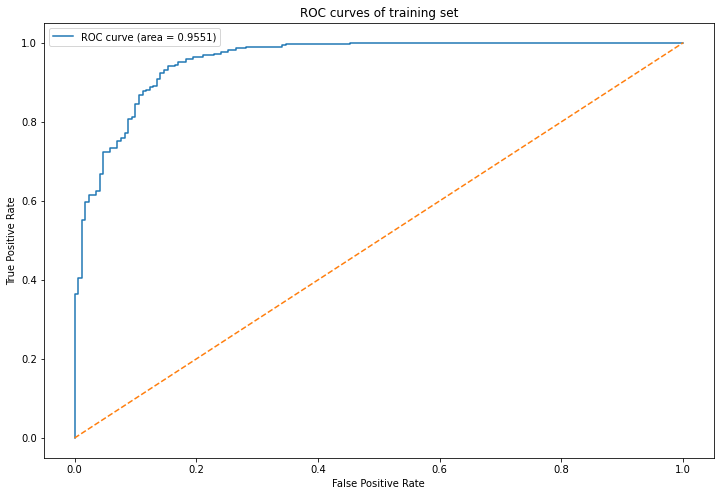

Confusion matrix of  test 
 [[28 14]
 [ 2 69]]
Accuracy : 0.8584070796460177


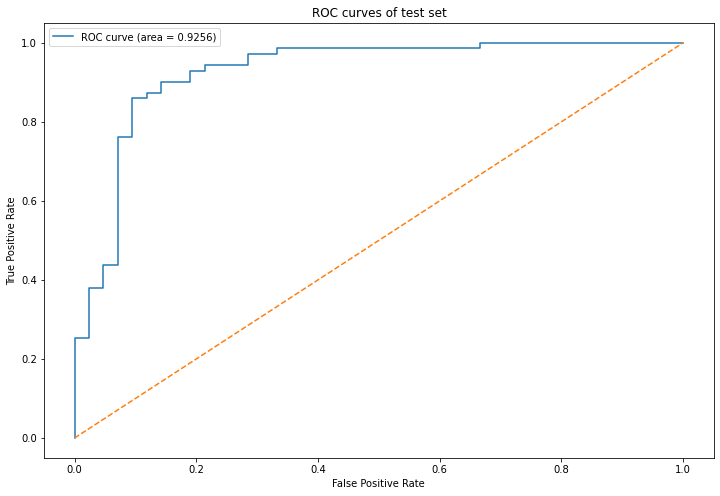

In [148]:
learnings['Unsupervised - Spectral Clustering'] = MCSpec(breastcancer_df, 30)

### __V. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.__

In [161]:
for i in learnings.keys():
    print(i,"\n",learnings[i],"\n-----------------")

Supervised 
           accuracy    recall  f1-score  precision       auc
training  0.984430  0.984430  0.984408   0.984454  0.998637
test      0.964307  0.964307  0.964203   0.964937  0.992993 
-----------------
Semi-Supervised 
           accuracy    recall  f1-score  precision      auc
training  0.981579  0.981579  0.981553   0.981600  0.99835
test      0.966372  0.966372  0.966263   0.966918  0.99424 
-----------------
Unsupervised-KMeans 
           accuracy  precision    recall  f1-score       auc
training  0.891009   0.899287  0.891009  0.887384  0.952253
test      0.876696   0.888499  0.876696  0.871286  0.944063 
-----------------
Unsupervised - Spectral Clustering 
           accuracy  precision    recall  f1-score      auc
training  0.883406   0.893267  0.883406  0.879072  0.94958
test      0.874631   0.886259  0.874631  0.869119  0.94976 
-----------------


- By above, we can say that **Supervised learning works better than Semi supervised learning.**
- Hence, Supervised > Semi-Supervised
- This is because, when model is trained with Supervised data, it learns from labels that gives more information than semi supervised and also unsupervised learning. In unsupervised learning it depends only on features. 
- There is only a very minor difference between Supervised and Semi-Supervised here.

# __2. Active Learning Using Support Vector Machines__

## __(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication.__

### __Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.__

In [150]:
bank_data = pd.read_csv('../data/data_banknote_authentication.txt', header = None)
bank_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
bank_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [151]:
bank_data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [152]:
test_df = np.random.choice(bank_data.shape[0], 472, replace=False)
train_datax = np.array([row for row in range(bank_data.shape[0]) if row not in test_df])

In [153]:
bank_train_data = bank_data.iloc[train_datax]
bank_train_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
4,0.32924,-4.45520,4.57180,-0.98880,0
5,4.36840,9.67180,-3.96060,-3.16250,0
6,3.59120,3.01290,0.72888,0.56421,0
...,...,...,...,...,...
1365,-4.50460,-5.81260,10.88670,-0.52846,1
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1369,-3.75030,-13.45860,17.59320,-2.77710,1
1370,-3.56370,-8.38270,12.39300,-1.28230,1


In [154]:
bank_test_data = bank_data.iloc[test_df]
bank_test_data

,variance,skewness,curtosis,entropy,class
930,-2.22140,-0.23798,0.560080,0.05602,1
860,-3.46050,2.69010,0.161650,-1.02240,1
1355,-6.16320,8.70960,-0.216210,-3.63450,1
893,-0.77288,-7.44730,6.492000,0.36119,1
1081,-5.11900,6.64860,-0.049987,-6.52060,1
...,...,...,...,...,...
657,-0.27800,8.18810,-3.133800,-2.52760,0
112,3.23510,9.64700,-3.207400,-2.59480,0
1110,-3.89520,3.81570,-0.313040,-3.81940,1
1224,0.26877,4.98700,-5.150800,-6.39130,1


## __(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.__

### __i. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.__

In [155]:
def passivelearn(testX, testY, trainX, trainY, params):
    remaining_datax = np.arange(trainX.shape[0])
    pool_datax = []
    accuracy_list = []
    while len(remaining_datax) > 0:
        np.random.shuffle(remaining_datax)
        pool_datax.extend(remaining_datax[:10])
        remaining_datax = remaining_datax[10:]
        used_train_X, used_train_Y = trainX[pool_datax], trainY.iloc[pool_datax]
        classifier = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
        classifier.fit(used_train_X, used_train_Y)
        test_predict = classifier.predict(testX)
        report = classification_report(testY, test_predict, output_dict=True)
        accuracy_list.append(report['accuracy'])
    return accuracy_list

### __ii. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.__

### __Active Learning__

In [156]:
def activelearn(testX, testY, trainX, trainY, params):
    remaining_datax = np.arange(trainX.shape[0])
    pool_datax = []
    accuracy_list = []
    np.random.shuffle(remaining_datax)
    pool_datax.extend(remaining_datax[:10])
    remaining_datax = remaining_datax[10:]
    while len(pool_datax) <= 900:
        used_train_X, used_train_Y = trainX[pool_datax], trainY.iloc[pool_datax]
        classifier = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
        classifier.fit(used_train_X, used_train_Y)
        test_predict = classifier.predict(testX)
        report = classification_report(testY, test_predict, output_dict=True)
        accuracy_list.append(report['accuracy'])
        if len(remaining_datax) == 0:
            break
        dist = classifier.decision_function(trainX[remaining_datax])
        sorted_arg = np.arange(len(remaining_datax))
        sorted(sorted_arg, key=lambda i : abs(dist[i]))
        remaining_datax = remaining_datax[sorted_arg]
        pool_datax.extend(remaining_datax[:10])
        remaining_datax = remaining_datax[10:]
    return accuracy_list

## __(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.__

In [157]:
def Simulation(data,learn_type):    
    pg = {'C' : np.logspace(-4, 5, 10)}
    params = {
        'param_grid' : pg
    }
    learning_curve = []
    for i in range(50):
        test_df = np.random.choice(bank_data.shape[0], 472, replace=False)
        train_datax = np.array([row for row in range(bank_data.shape[0]) if row not in test_df])
        train_set, test_set = data.iloc[train_datax], data.iloc[test_df]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        trainX, testX = normalizeData(trainX, testX)
        splitter = StratifiedKFold(5, random_state=i, shuffle=True)
        params['cv'] = splitter
        if learn_type=="active":
            acc = activelearn( testX, testY, trainX, trainY, params)
        elif learn_type=="passive":
            acc = passivelearn( testX, testY, trainX, trainY, params)
        learning_curve.append(acc)
        print("Simulation Attempt ", i+1)
        print("Final Test Accuracy with 900 samples : ", acc[-1])
        print("-----"*4)
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [158]:
passive_Learning_Curve = Simulation(bank_data,"passive")

Simulation Attempt  1
Final Test Accuracy with 900 samples :  0.9915254237288136
--------------------
Simulation Attempt  2
Final Test Accuracy with 900 samples :  0.9915254237288136
--------------------
Simulation Attempt  3
Final Test Accuracy with 900 samples :  0.9957627118644068
--------------------
Simulation Attempt  4
Final Test Accuracy with 900 samples :  0.9936440677966102
--------------------
Simulation Attempt  5
Final Test Accuracy with 900 samples :  0.9915254237288136
--------------------
Simulation Attempt  6
Final Test Accuracy with 900 samples :  0.9957627118644068
--------------------
Simulation Attempt  7
Final Test Accuracy with 900 samples :  0.9936440677966102
--------------------
Simulation Attempt  8
Final Test Accuracy with 900 samples :  0.9957627118644068
--------------------
Simulation Attempt  9
Final Test Accuracy with 900 samples :  0.9936440677966102
--------------------
Simulation Attempt  10
Final Test Accuracy with 900 samples :  0.9915254237288136


In [159]:
active_Learning_Curve = Simulation(bank_data,"active")

Simulation Attempt  1
Final Test Accuracy with 900 samples :  0.989406779661017
--------------------
Simulation Attempt  2
Final Test Accuracy with 900 samples :  0.9978813559322034
--------------------
Simulation Attempt  3
Final Test Accuracy with 900 samples :  0.9957627118644068
--------------------
Simulation Attempt  4
Final Test Accuracy with 900 samples :  0.989406779661017
--------------------
Simulation Attempt  5
Final Test Accuracy with 900 samples :  0.9936440677966102
--------------------
Simulation Attempt  6
Final Test Accuracy with 900 samples :  0.9872881355932204
--------------------
Simulation Attempt  7
Final Test Accuracy with 900 samples :  0.989406779661017
--------------------
Simulation Attempt  8
Final Test Accuracy with 900 samples :  0.9915254237288136
--------------------
Simulation Attempt  9
Final Test Accuracy with 900 samples :  0.9957627118644068
--------------------
Simulation Attempt  10
Final Test Accuracy with 900 samples :  0.9957627118644068
---

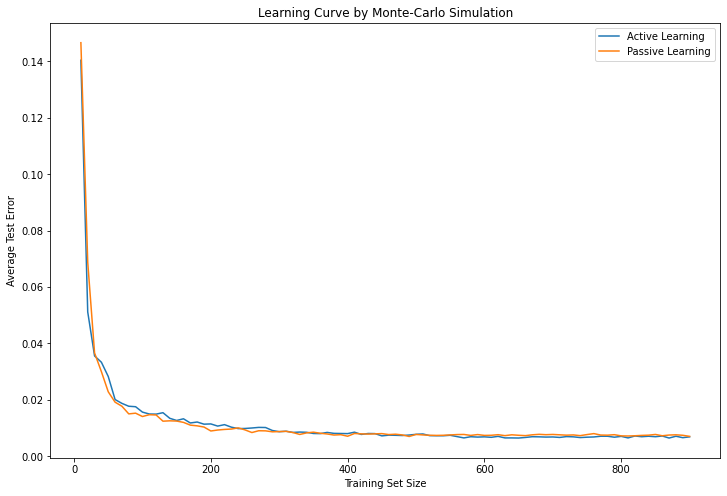

In [160]:
x = 10 * np.arange(1, 91)
fig, axes = plt.subplots(figsize=(12, 8))
axes.set_xlabel("Training Set Size")
axes.set_ylabel("Average Test Error")
axes.set_title("Learning Curve by Monte-Carlo Simulation")
axes.plot(x, 1 - active_Learning_Curve, label='Active Learning')
axes.plot(x, 1 - passive_Learning_Curve, label='Passive Learning')
axes.legend()
plt.show()

### __Conclusions:__

- For small sample size => training model is overfit. The test error will be more.
- For large sample size => Model learns better and reports low test error. [ Scenario of both both active and passive learning ]


**References and Citations:**

1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv
4. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc
5. https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
6. https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
9. https://scikit-learn.org/stable/developers/develop.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
11. https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm
12. https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/